### Download de dataset m.b.v. load_iris() uit sklearn.datasets.

In [154]:

import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

iris = sklearn.datasets.load_iris()

### Vul je featurematrix X op basis van de data.

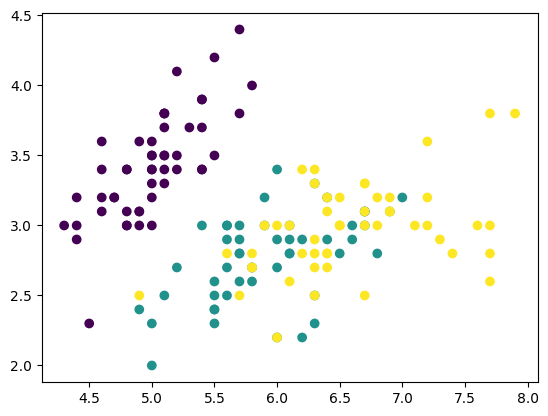

In [155]:
X = iris.data

plt.scatter(X[:,0], X[:,1], c=iris.target)

#### De uitkomstvector y ga je vullen op basis van target. 
Standaard bevat deze array de waardes 0, 1 en 2 (resp. 'setosa', 'versicolor', 'virginica'). Maak deze binair door 0 en 1 allebei 0 te maken (niet-virginica) en van elke 2 een 1 te maken (wel-virginica). Denk erom dat y het juiste datatype en de juiste shape krijgt.

In [156]:
y = iris.target

print(X.shape)
print(y.shape)
print(y.T)

y = np.where(y == 2, 1, 0)
print(y.T)
print(y.shape)


(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
(150,)


### Definieer een functie sigmoid() die de sigmoïde-functie implementeert.

In [157]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

test_sigmoid = 0
sigmoid(test_sigmoid)

0.5

### Initialiseer een vector theta met 1.0'en in de juiste shape.

In [158]:
# Add a column of ones to the feature matrix X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize theta with ones
theta = np.ones(X.shape[1])

# Check the shapes
X.shape, theta.shape

((150, 5), (5,))

### Nu kun je beginnen aan de loop waarin je in 1500 iteraties:
- De voorspellingen (denk aan sigmoid!) en de errors berekent.
- De gradient berekent en theta aanpast. Werk in eerste instantie met een learning rate van 0.01.
- De kosten berekent.

In [159]:
def compute_cost(X, y, theta):
    return y*np.log(sigmoid(np.dot(X, theta)))+(1-y)*np.log(1-sigmoid((np.dot(X, theta))))
    return -y*np.log(sigmoid(np.dot(X, theta)))-(1-y)*np.log(1-sigmoid((np.dot(X, theta))))

Het begint bij: 8.811340034891423 en eindigt bij: 0.24547935272698487


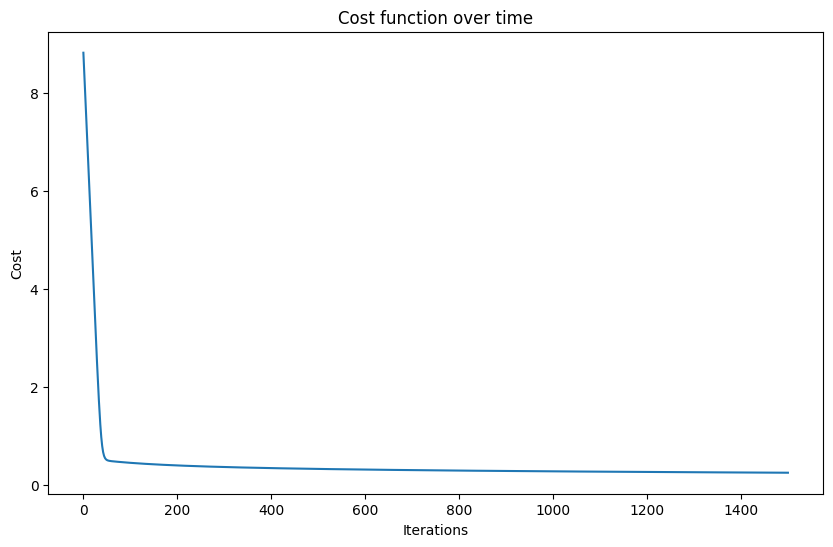

In [160]:
theta = np.ones(X.shape[1])

num_iterations = 1500
learning_rate = 0.01

costs = []

for _ in range(num_iterations):
    predictions = sigmoid(np.dot(X, theta))
    
    errors = y - predictions
    
    gradient = -np.dot(errors, X) / len(y)
    
    theta -= learning_rate * gradient
    
    cost = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)).mean()
    costs.append(cost)

print("Het begint bij: " + str(costs[0]) + " en eindigt bij: " + str(costs[-1]))
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function over time")
plt.show()

    
# print(theta)
    

### Experimenteer eens met andere waardes van de learning rate (1.0 < alpha < 0.0).

Het begint bij: 8.811340034891423 en eindigt bij: 8.811340034891423


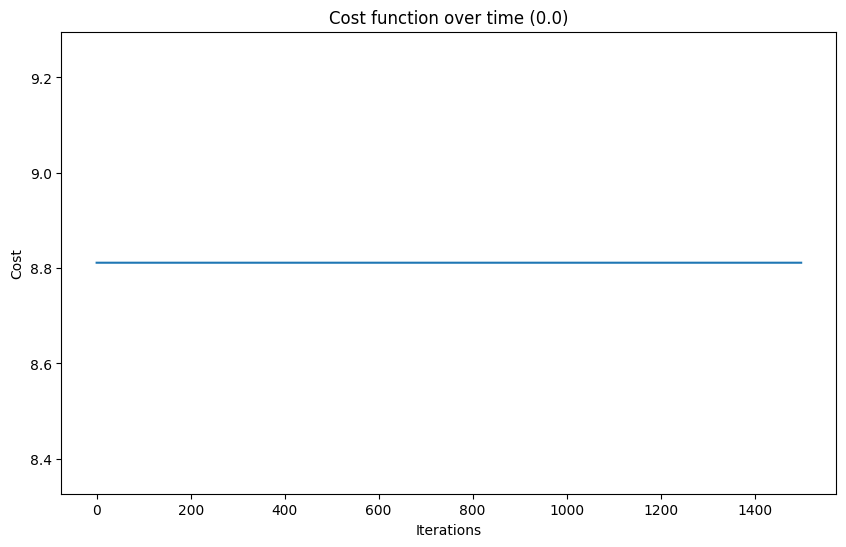

Het begint bij: 8.811340034891423 en eindigt bij: 0.11066592133238276


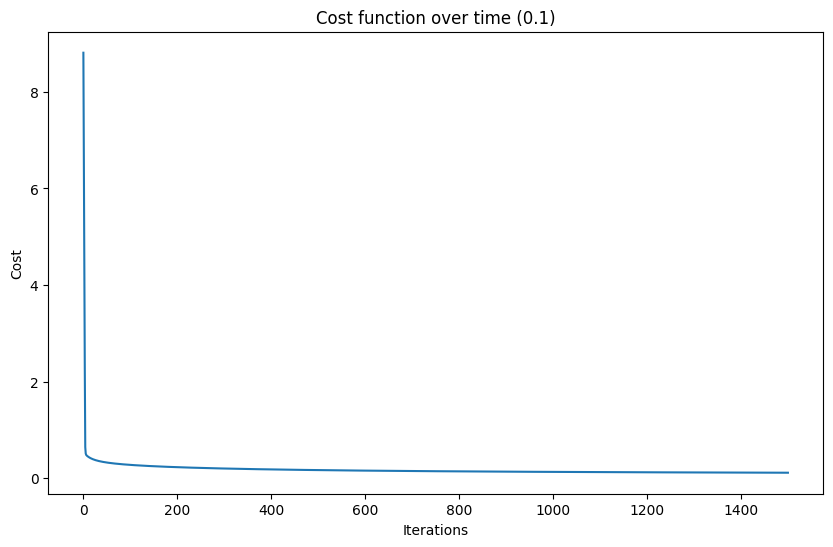

Het begint bij: 8.811340034891423 en eindigt bij: 0.07915189197545675


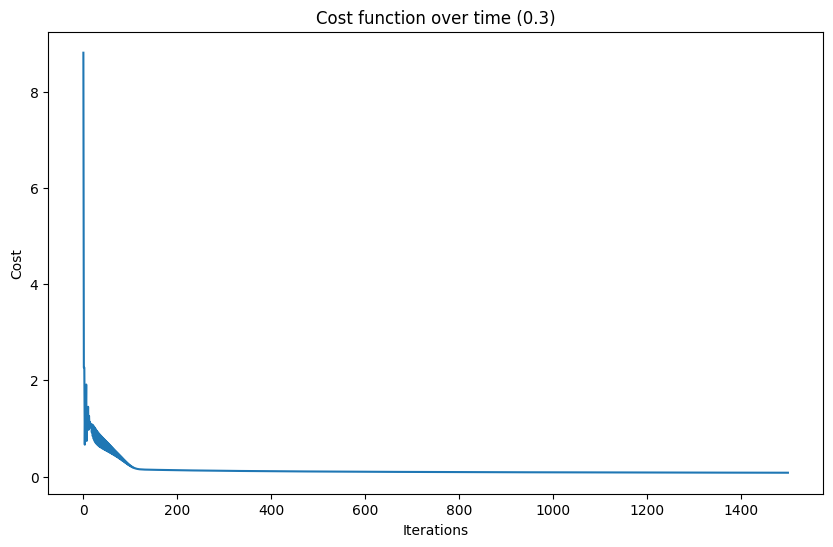

Het begint bij: 8.811340034891423 en eindigt bij: 0.06924801303120254


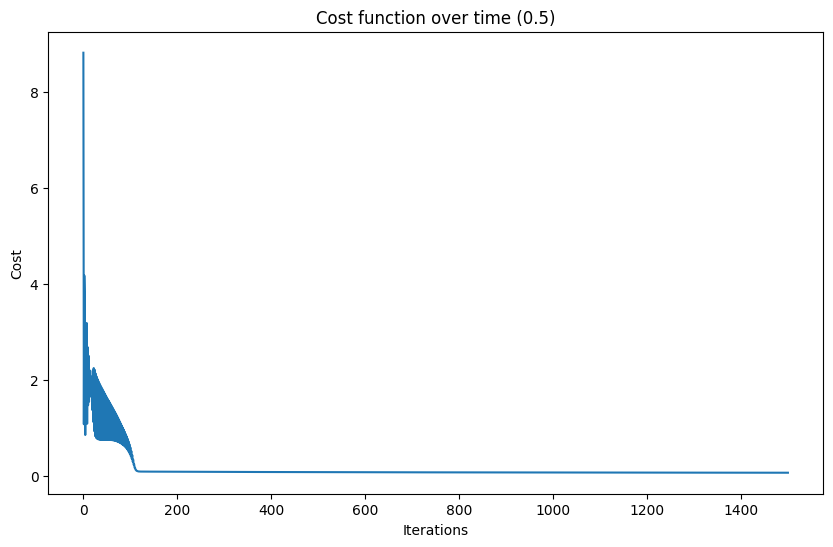

Het begint bij: 8.811340034891423 en eindigt bij: 0.06403005772574233


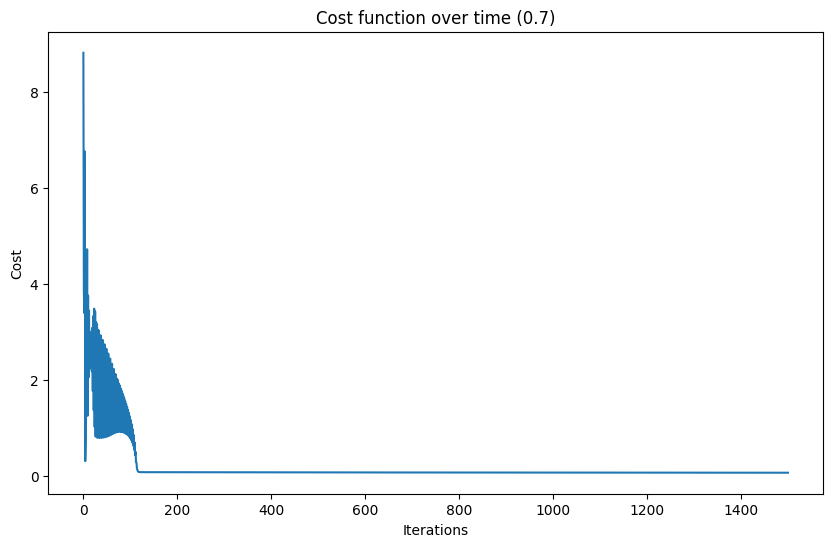

Het begint bij: 8.811340034891423 en eindigt bij: 0.06140067497621743


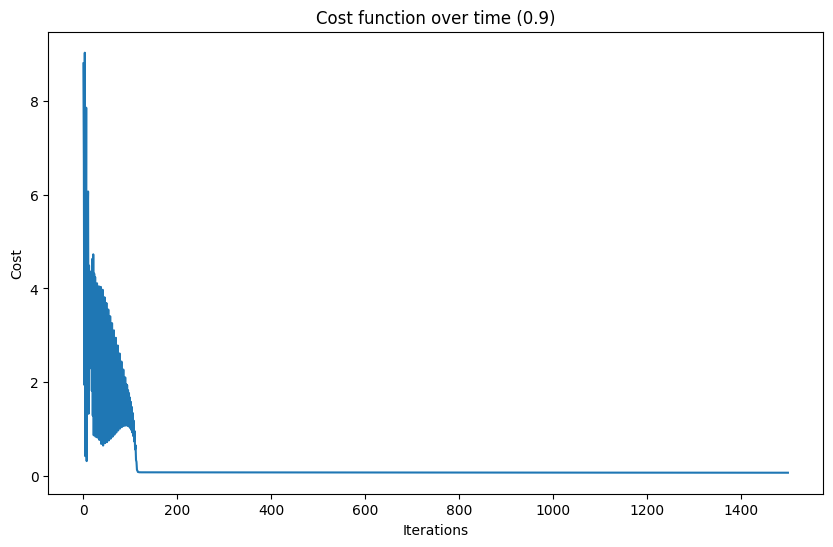

Het begint bij: 8.811340034891423 en eindigt bij: 0.060772272132048666


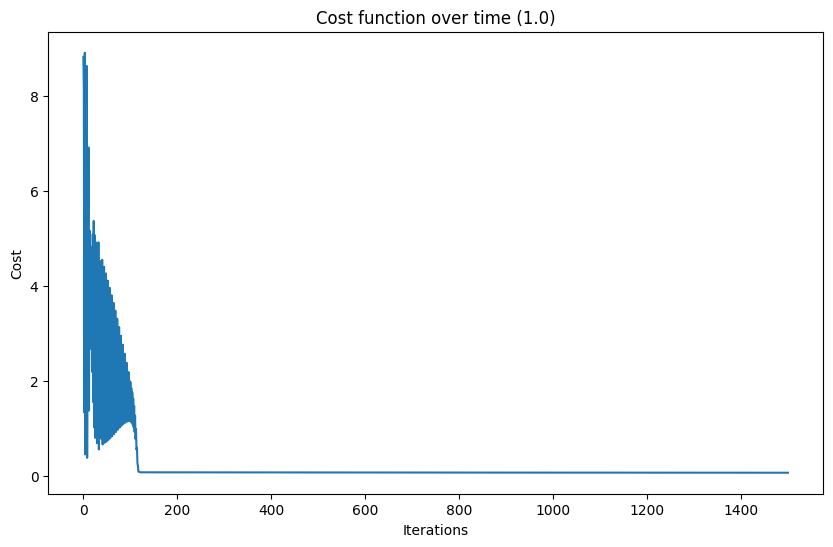

In [164]:
LearningRates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

for i in LearningRates:
    theta = np.ones(X.shape[1])
    costs = []

    for _ in range(num_iterations):
        predictions = sigmoid(np.dot(X, theta))
        
        errors = y - predictions
        
        gradient = -np.dot(errors, X) / len(y)
        
        theta -= i * gradient
        
        cost = (-y * np.log(predictions) - (1 - y) * np.log(1 - predictions)).mean()
        costs.append(cost)
    
    print("Het begint bij: " + str(costs[0]) + " en eindigt bij: " + str(costs[-1]))
    plt.figure(figsize=(10, 6))
    plt.plot(costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"Cost function over time ({i})")
    plt.show()
